<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Justin Pham
* **UCID** = 30139323
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [45]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open seeds.zip, seeds.zip.zip or seeds.zip.ZIP.
rm: cannot remove 'seeds.zip': No such file or directory


In [55]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

df = data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

Text(0.5, 1.0, 'Training data proportions for kernel dataset')

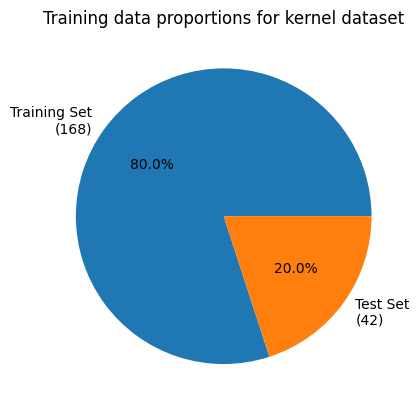

In [47]:
# 1.1
# Add necessary code here.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data.drop('Type', axis = 1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

labels = [f"Training Set\n({len(X_train)})", f"Test Set\n({len(X_test)})"]
plot_Title = "Training data proportions for kernel dataset"
sizes = [len(X_train), len(X_test)]

fig, axes = plt.subplots()
axes.pie(sizes, labels=labels, autopct='%1.1f%%')
axes.set_title(plot_Title)


<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


<font color='Green'><b>Answer:</b></font>

- **1.2** I used StandardScaler from the sklearn library. I used this scaler because I am familiar with it and it is easy to use. It standardizes features by removing the mean and scaling to unit variance. In addition, features with different units or scales of measurement will be scaled, allowing the algorithm to fairly weigh all the features.



### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [49]:
# 1.3
# Add necessary code here.
from sklearn.ensemble import RandomForestClassifier

_RANDOM_STATE = 42
rf = RandomForestClassifier(random_state=_RANDOM_STATE)


<font color='Green'><b>Answer:</b></font>

- **1.3** 
The RandomForestClassifier is well-suited for this dataset due to several compelling reasons. First, it is designed to handle classification tasks, which aligns with the nature of the data in question. Furthermore, compared to certain other models, such as a single decision tree, Random Forest tends to achieve better performance metrics. This enhanced performance is partly because Random Forest can uncover complex, non-linear relationships between features and the target variable, which is beneficial in scenarios where the decision boundaries are intricate. Additionally, the ensemble method of Random Forest, which aggregates the outcomes of multiple decision trees, is generally more resilient to outliers and noise. This resilience stems from the ensemble's ability to balance out the eccentricities of individual trees, thereby producing a more reliable and generalizable model.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [50]:
# 1.4
# Add necessary code here.
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


steps = [scaler, rf]
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [2, 3, 4],
    "classifier__min_samples_split": [2, 3, 4], 
    "classifier__min_samples_leaf": [1, 2, 3],
}
scoring = {
    'accuracy': make_scorer(accuracy_score),         # Scoring based on accuracy_score
    'f1_score': make_scorer(f1_score)                # Scoring based on F1_score
}

pipe_rf = Pipeline([('scaler', scaler), ('classifier', rf)])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy')
def printResults(X, y):
    grid_rf.fit(X, y)
    best_params = grid_rf.best_params_
    print("Best params: ", best_params)
    print("Best score: ", grid_rf.best_score_)

printResults(X_train, y_train)
printResults(X_test, y_test)

c:\Users\night\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best score:  0.9106951871657755
Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best score:  0.9305555555555556


c:\Users\night\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [51]:
# 1.5
# Add necessary code here.
from sklearn.decomposition import PCA
import numpy as np


pca = PCA()
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result)
pca_df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('target', axis=1), pca_df['target'], test_size = 0.2, random_state = _RANDOM_STATE, stratify=y)

def printResults(X, y):
    grid_rf.fit(X, y)
    best_params = grid_rf.best_params_
    print("Best params: ", best_params)
    print("Best score: ", grid_rf.best_score_)

printResults(X_train, y_train)
printResults(X_test, y_test)

c:\Users\night\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best score:  0.9643493761140821
Best params:  {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best score:  0.9527777777777778


c:\Users\night\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<font color='Green'><b>Answer:</b></font>

- **1.5** PCA goes well with this dataset since we are aiming to classify different seeds based on different features. PCA reduces the dimensionality of the dataset and helps determine the global structure of the data. PCA is also faster and has the advantage of interpretability in terms of the original features.


without PCA:
Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
train Best score:  0.9106951871657755
Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
test Best score:  0.9305555555555556

with PCA:
Best params:  {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
train Best score:  0.9643493761140821
Best params:  {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
test Best score:  0.9527777777777778

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

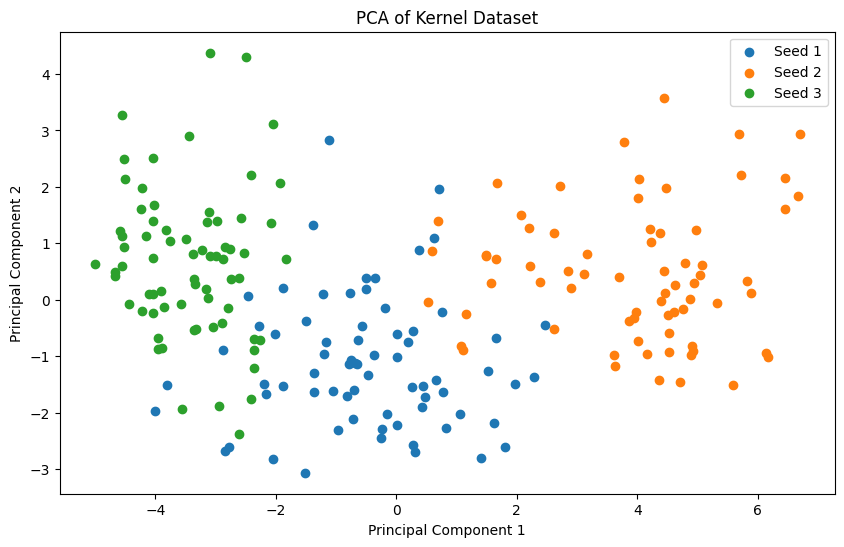

In [52]:
# 1.6
# Add necessary code here.

plt.figure(figsize=(10, 6))
for seed in range(3):
  plt.scatter(pca_df[pca_df['target'] == seed + 1][0], pca_df[pca_df['target'] == seed + 1][1], label=f"Seed {seed + 1}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Kernel Dataset')
plt.legend()
plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

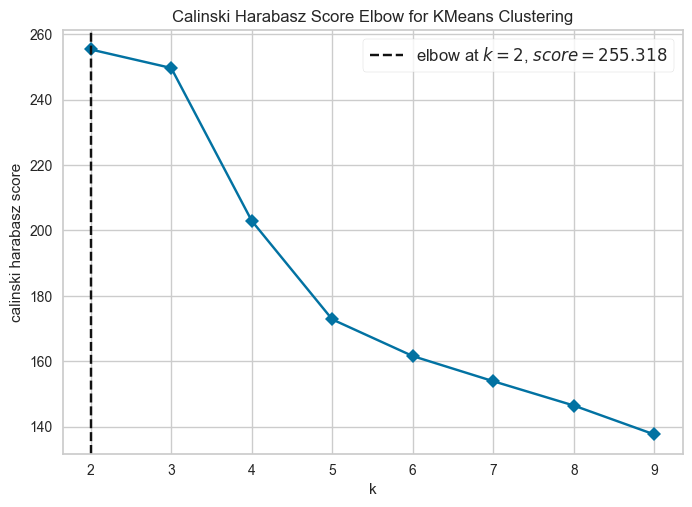

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [78]:
# 2.1
# Add necessary code here.
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer

X = df.iloc[:, :-1]
model =    KMeans(random_state=42)
scaler = StandardScaler()
pipeline = make_pipeline(
    scaler,
    model
) 
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)
visualizer.fit(scaler.fit_transform(X))  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure


<font color='Green'><b>Answer:</b></font>

- **2.1**
The KelbowVisualizer implements the "elbow" method to help data scientists select the optimal number of clusters by fitting the model with a range of values for k. For each value of k, the model's performance is evaluated using the calinski_harabasz scoring metric. The graph shows us that the best k value is 2 and the score gradually decreases as k increases.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [80]:
# 2.2
# Add necessary code here.

k_optimal = 2

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k_optimal, random_state=_RANDOM_STATE)),
])
pipeline.fit(X)

cluster_labels = pipeline.predict(X)
cluster_labels



array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [91]:
# 2.3
# Add necessary code here.
pca = PCA().set_output(transform="pandas")
pca_result = pca.fit_transform(X)
pca_result

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,0.663448,-1.417321,0.041236,0.204508,-0.022950,-0.016195,-0.000468
1,0.315667,-2.689229,0.231727,0.159047,0.013652,-0.011923,0.003372
2,-0.660499,-1.131506,0.527087,0.004501,0.009702,0.012343,-0.003812
3,-1.055276,-1.621190,0.437015,0.013738,-0.047391,-0.108916,0.008139
4,1.619999,-2.183384,0.333991,0.015436,-0.015315,-0.025988,0.001728
...,...,...,...,...,...,...,...
205,-3.041872,-0.473126,0.195045,-0.078221,-0.037126,0.027254,-0.002288
206,-4.109063,0.109341,-0.087401,-0.089661,-0.052781,0.009596,0.004280
207,-2.500034,4.307965,0.532818,-0.025882,-0.017149,-0.069708,-0.003557
208,-3.332079,-0.525290,-0.098108,-0.058140,0.024417,0.033612,0.000808


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

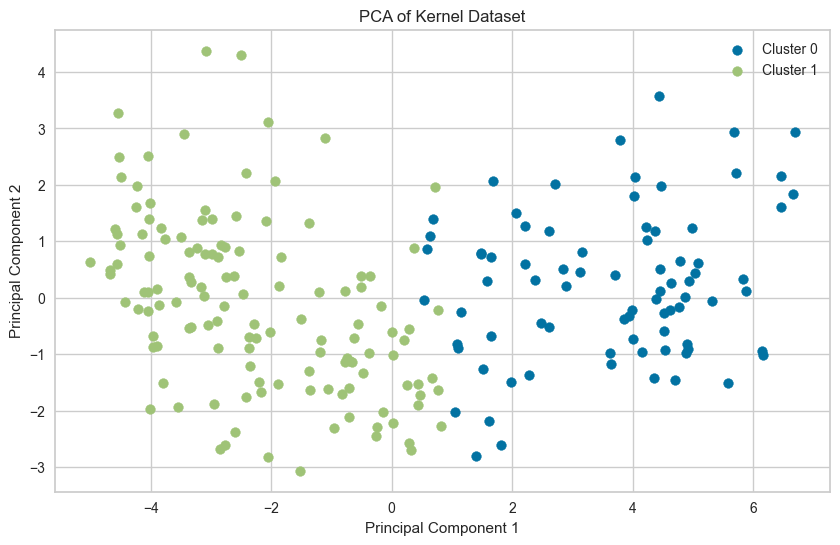

In [103]:
# 2.4
# Add necessary code here.
pca_result['cluster'] = cluster_labels
pca_result
plt.figure(figsize=(10, 6))

for cluster in range(k_optimal):
  plt.scatter(
    pca_result.loc[pca_result['cluster'] == cluster].iloc[:, 0],
    pca_result.loc[pca_result['cluster'] == cluster].iloc[:, 1],
    label=f"Cluster {cluster}"
  )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Kernel Dataset')
plt.legend()
plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................